# Workflow
1. import library
2. Dataloading
3. Data preprocessing
4. Feature Engineering or feature selection.
5. Graphical representation
6. Label encoding
7. Save encoded data (for production)
8. Up-sampling or Handle imbalenced data.
9. Model Training & Select right model according to dataset.
10. check model performance or report.
11. Save and Load Trained model for deployment
12. Prediction.

# Import Libraries

In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

import pickle
from sklearn.preprocessing import LabelEncoder

# Load Dataset.

In [468]:
df = pd.read_csv("C:\\Users\\BKJST\\Desktop\\python\\Machine learning\\telecom_churn_dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Perform EDA or Data cleaning.

In [469]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [470]:
df.shape

(7043, 21)

In [471]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [472]:
df.isnull().sum() # check null value.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [473]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [474]:
{col: df[col].unique() for col in df.columns}

{'customerID': array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
        '8361-LTMKD', '3186-AJIEK'], dtype=object),
 'gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array([0, 1]),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'tenure': array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
        21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
         9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
        36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
        54, 51, 26,  0, 39]),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBackup': array(['Yes', 'No', 'No internet service'], 

### Feature selection

In [475]:
# Feature Selection:- select most relevent feature.
# we can take all columns, but i selected some important only.
df1 = df[['gender','SeniorCitizen','Dependents','tenure','PhoneService','MultipleLines','InternetService','TechSupport',
          'OnlineBackup','StreamingTV','Contract','PaymentMethod','MonthlyCharges','TotalCharges','Churn']]
df1

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,TechSupport,OnlineBackup,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,1,No,No phone service,DSL,No,Yes,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,0,No,34,Yes,No,DSL,No,No,No,One year,Mailed check,56.95,1889.5,No
2,Male,0,No,2,Yes,No,DSL,No,Yes,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,0,No,45,No,No phone service,DSL,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,2,Yes,No,Fiber optic,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,24,Yes,Yes,DSL,Yes,No,Yes,One year,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,One year,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,11,No,No phone service,DSL,No,No,No,Month-to-month,Electronic check,29.60,346.45,No
7041,Male,1,No,4,Yes,Yes,Fiber optic,No,No,No,Month-to-month,Mailed check,74.40,306.6,Yes


In [476]:
df1[:1]

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,TechSupport,OnlineBackup,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,1,No,No phone service,DSL,No,Yes,No,Month-to-month,Electronic check,29.85,29.85,No


In [477]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [478]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   object 
 1   SeniorCitizen    7043 non-null   int64  
 2   Dependents       7043 non-null   object 
 3   tenure           7043 non-null   int64  
 4   PhoneService     7043 non-null   object 
 5   MultipleLines    7043 non-null   object 
 6   InternetService  7043 non-null   object 
 7   TechSupport      7043 non-null   object 
 8   OnlineBackup     7043 non-null   object 
 9   StreamingTV      7043 non-null   object 
 10  Contract         7043 non-null   object 
 11  PaymentMethod    7043 non-null   object 
 12  MonthlyCharges   7043 non-null   float64
 13  TotalCharges     7043 non-null   object 
 14  Churn            7043 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 825.5+ KB


In [479]:
df1['TotalCharges'].dtype

dtype('O')

In [480]:
# convert object data into flaot data type.
df1['TotalCharges'] = df1['TotalCharges'].replace({' ':0})
df1['TotalCharges'] = df1['TotalCharges'].astype(float)

C:\Users\BKJST\AppData\Local\Temp\ipykernel_6028\1447444929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = df1['TotalCharges'].replace({' ':0})
C:\Users\BKJST\AppData\Local\Temp\ipykernel_6028\1447444929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = df1['TotalCharges'].astype(float)


In [481]:
df1['TotalCharges'].dtype # successfully converted into float.

dtype('float64')

In [482]:
df1.TotalCharges.describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [483]:
df1.describe().sum()

SeniorCitizen      7044.530758
tenure             7264.930630
MonthlyCharges     7470.551740
TotalCharges      25854.028773
dtype: float64

In [484]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   object 
 1   SeniorCitizen    7043 non-null   int64  
 2   Dependents       7043 non-null   object 
 3   tenure           7043 non-null   int64  
 4   PhoneService     7043 non-null   object 
 5   MultipleLines    7043 non-null   object 
 6   InternetService  7043 non-null   object 
 7   TechSupport      7043 non-null   object 
 8   OnlineBackup     7043 non-null   object 
 9   StreamingTV      7043 non-null   object 
 10  Contract         7043 non-null   object 
 11  PaymentMethod    7043 non-null   object 
 12  MonthlyCharges   7043 non-null   float64
 13  TotalCharges     7043 non-null   float64
 14  Churn            7043 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 825.5+ KB


## Graphical representation of Numerical feature.

In [485]:
# Let's plot the graph.
def  plot_histogram(df, column):
    plt.figure(figsize = (12,6))
    sns.histplot(df[column], kde = True)
    plt.title(f"Distribution of {column}")

    col_mean = df[column].mean()
    col_median = df[column].median()

    plt.axvline(col_mean, color = 'r', linestyle = '--', linewidth = 1, label = 'Col_mean')
    plt.axvline(col_median, color = 'b', linestyle = '--', linewidth = 1, label = 'Col_median')

    plt.legend()
    plt.show()

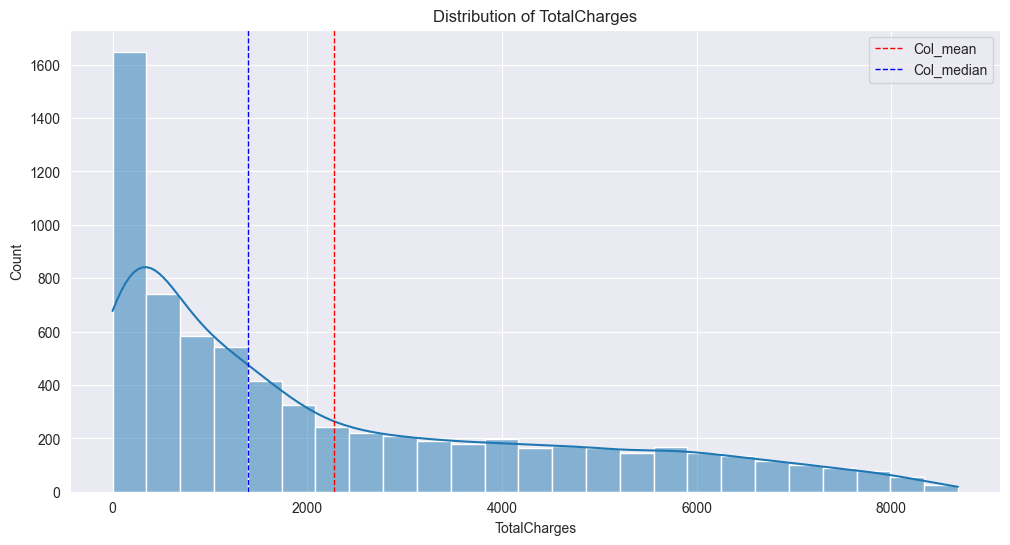

In [486]:
df2 = df1.copy() # we will use df2 instead if df1. if we will face any issue after encoding etc. then eaisly we can .
plot_histogram(df2, "TotalCharges")

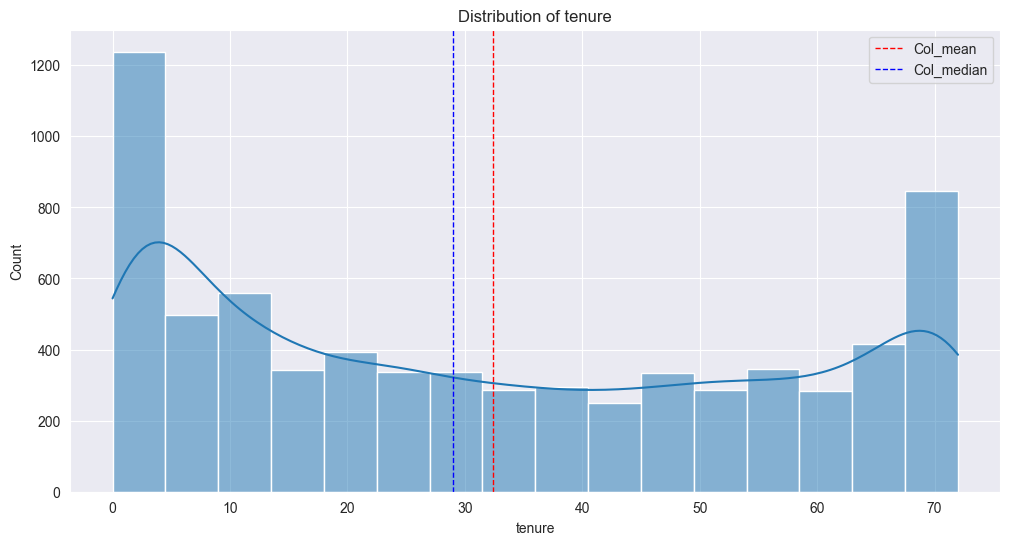

In [487]:
plot_histogram(df2, 'tenure')

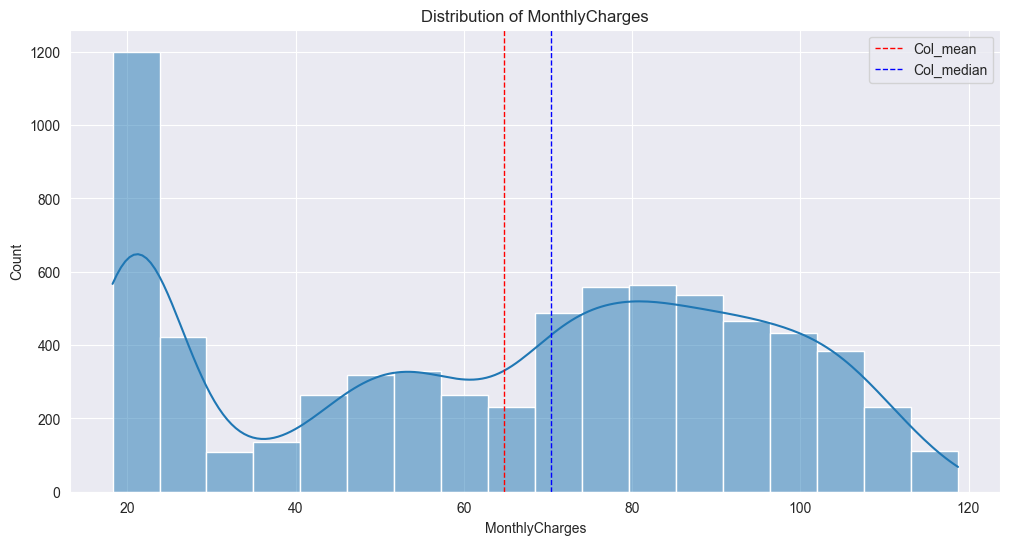

In [488]:
plot_histogram(df2, "MonthlyCharges")

In [489]:
def box_plot(df, column):
    plt.figure(figsize = (12,6))
    sns.boxplot(y = df[column])
    plt.title(f'Box Plot of {column}')

    plt.show()

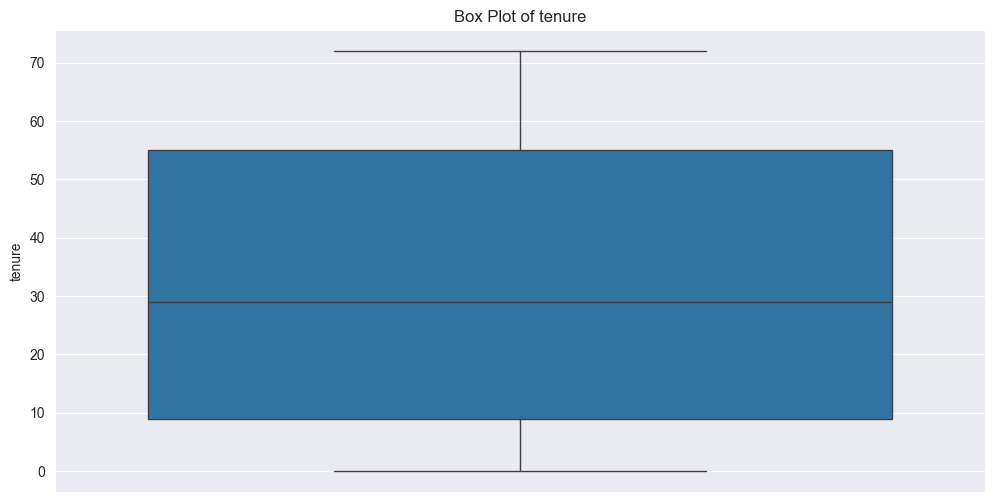

In [490]:
box_plot(df2,'tenure')

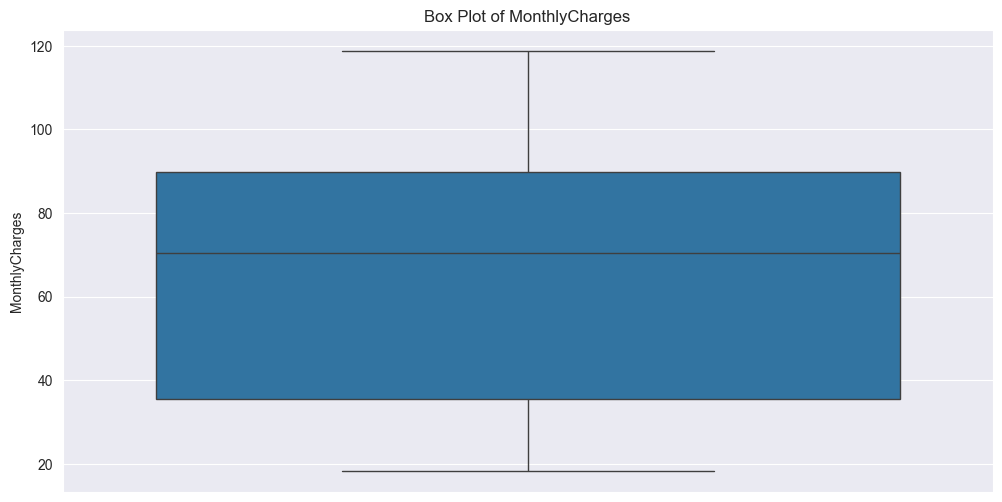

In [491]:
box_plot(df2, "MonthlyCharges")

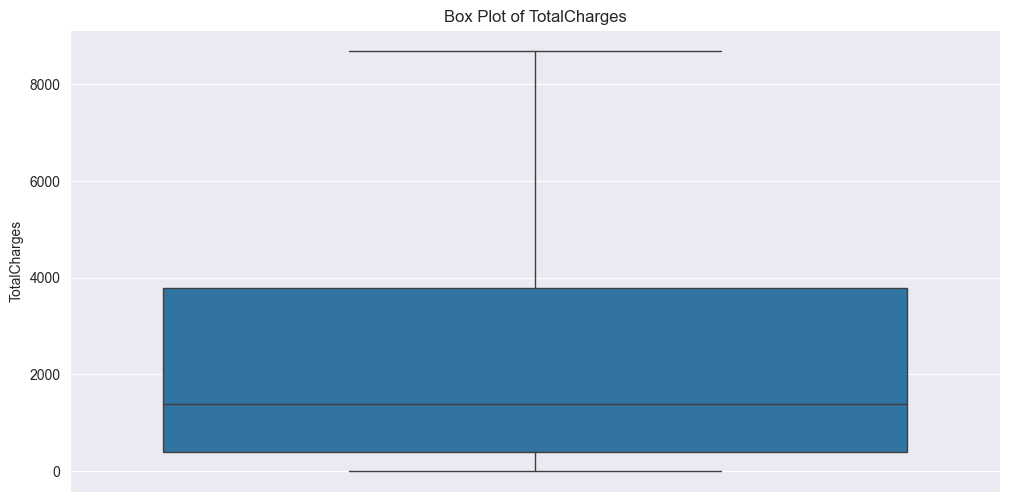

In [492]:
box_plot(df2, "TotalCharges")

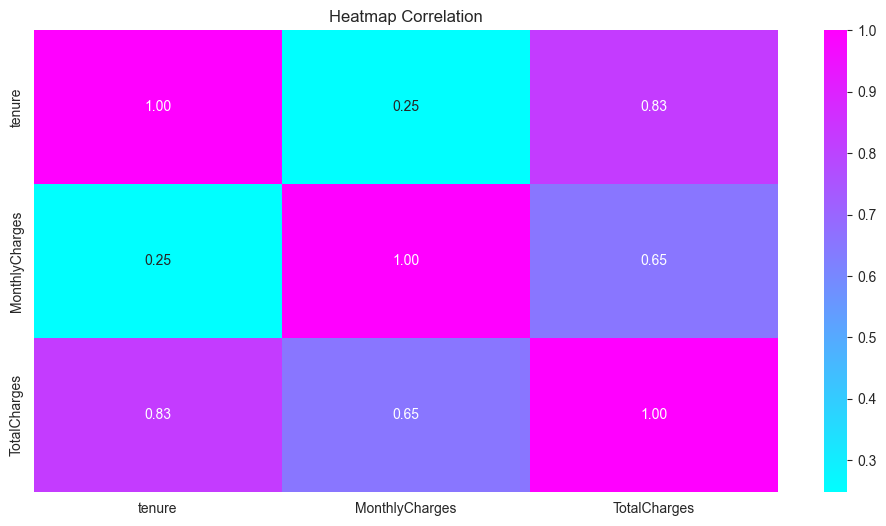

In [493]:
plt.figure(figsize = (12,6))
sns.heatmap(df2[['tenure','MonthlyCharges','TotalCharges']].corr(), annot= True,
            fmt=".2f", cmap = 'cool'
           )

plt.title('Heatmap Correlation')
plt.show()

In [494]:
df2.SeniorCitizen.dtype

dtype('int64')

In [495]:
df2.SeniorCitizen.unique()

array([0, 1])

In [496]:
object_cols = df2.select_dtypes(include= 'object').columns.to_list()
object_cols = ['SeniorCitizen'] + object_cols

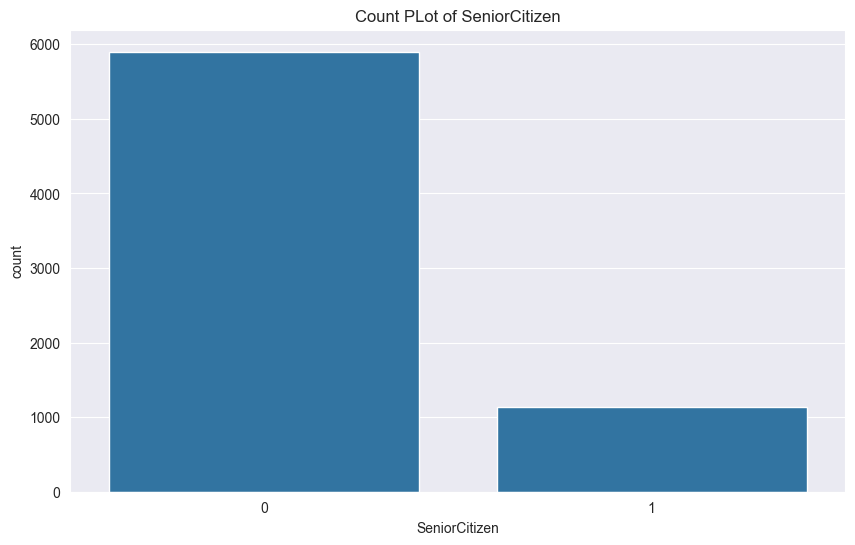

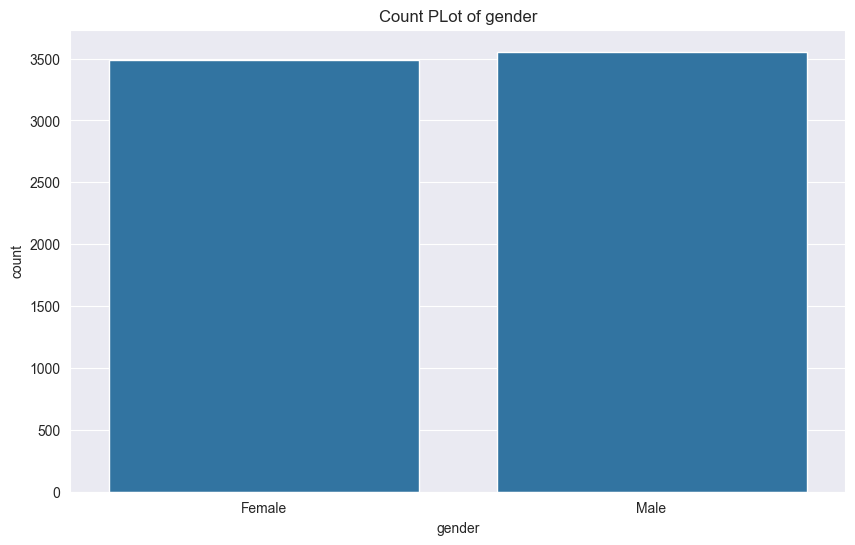

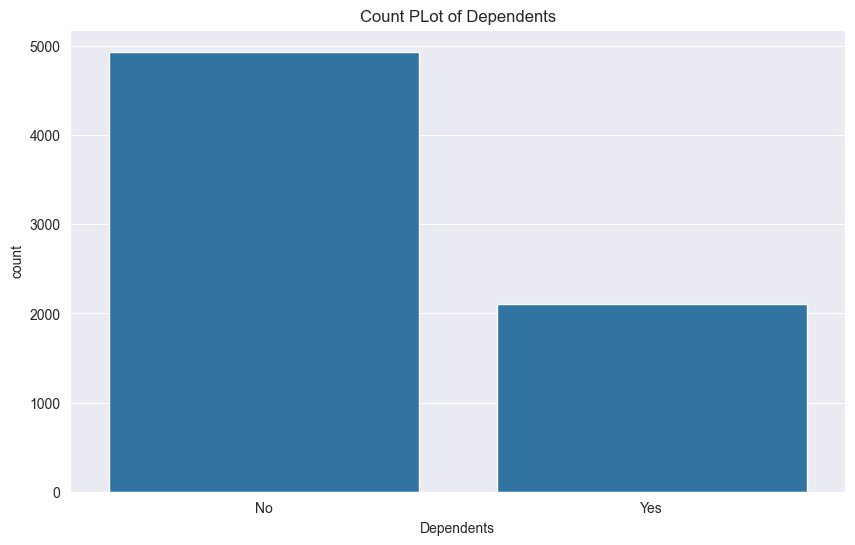

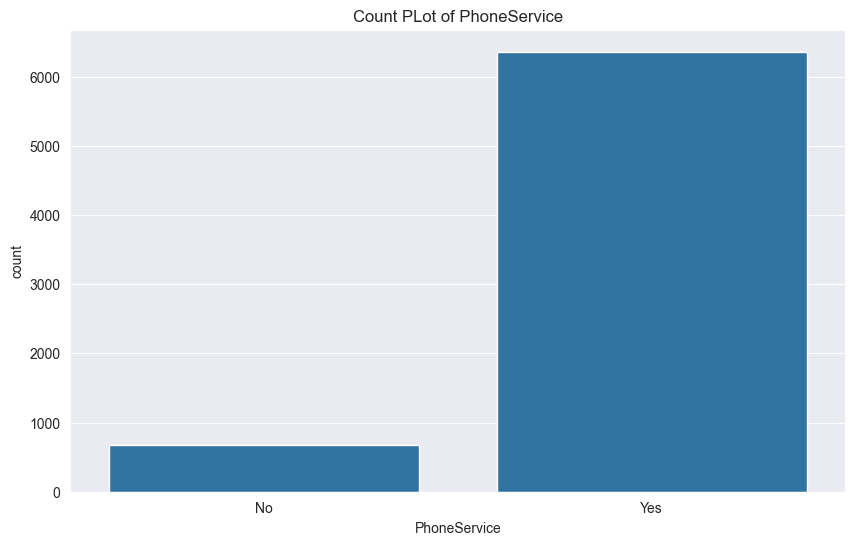

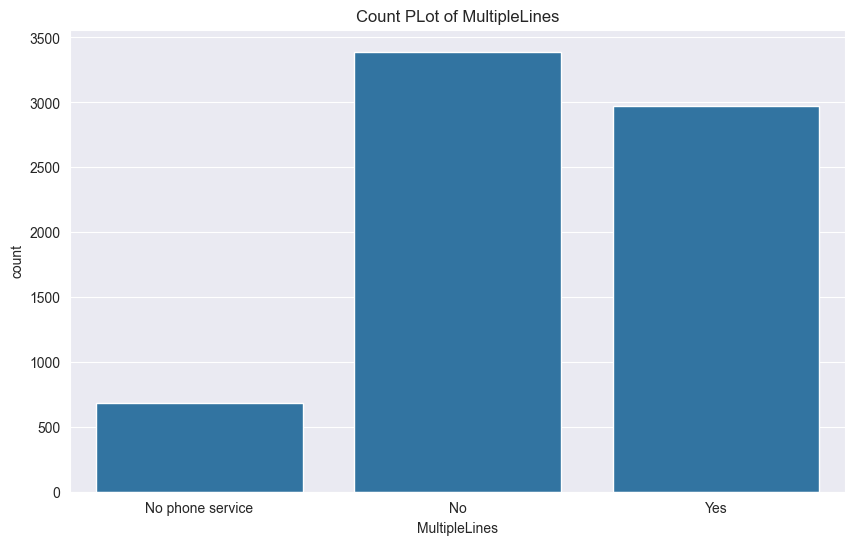

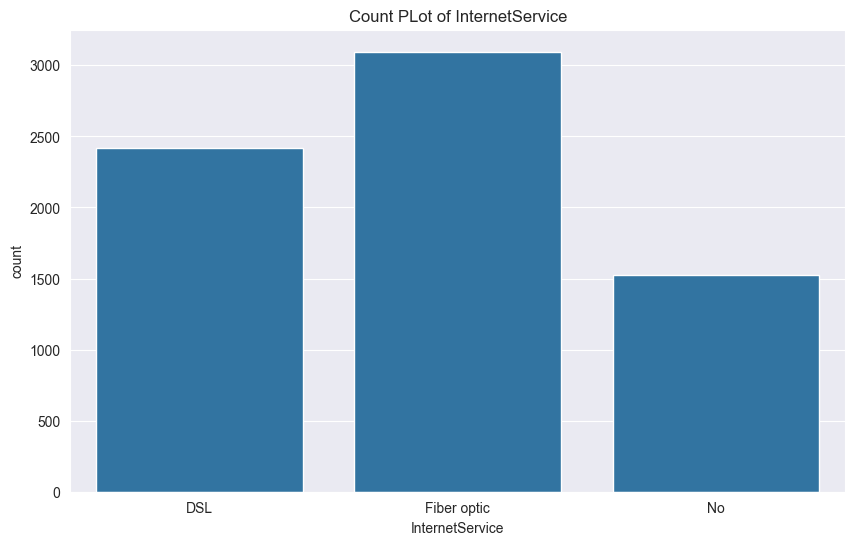

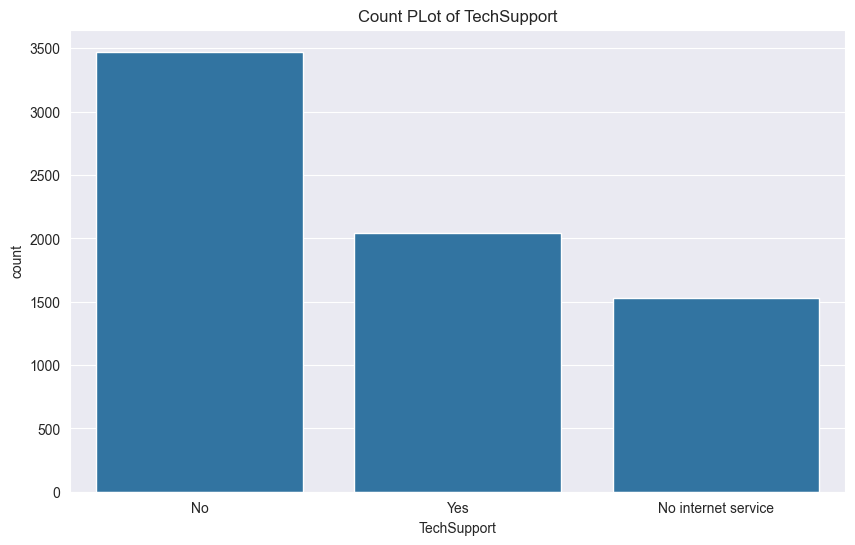

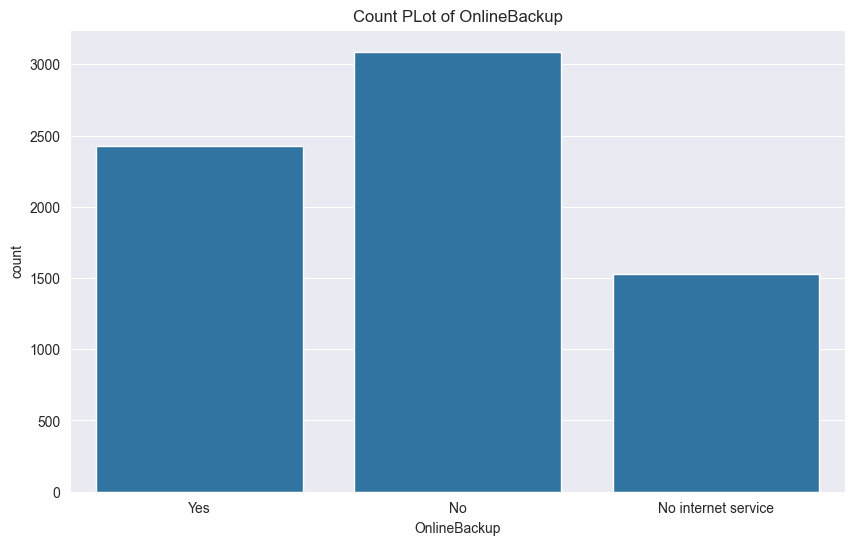

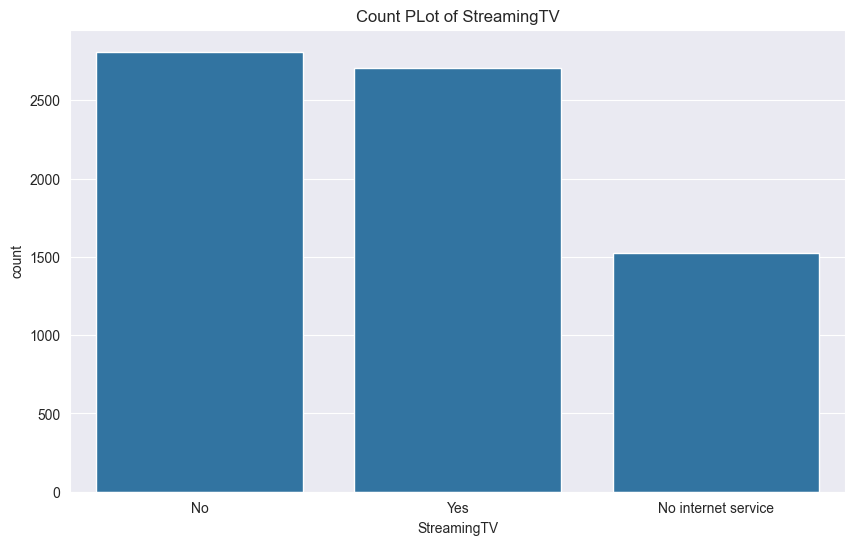

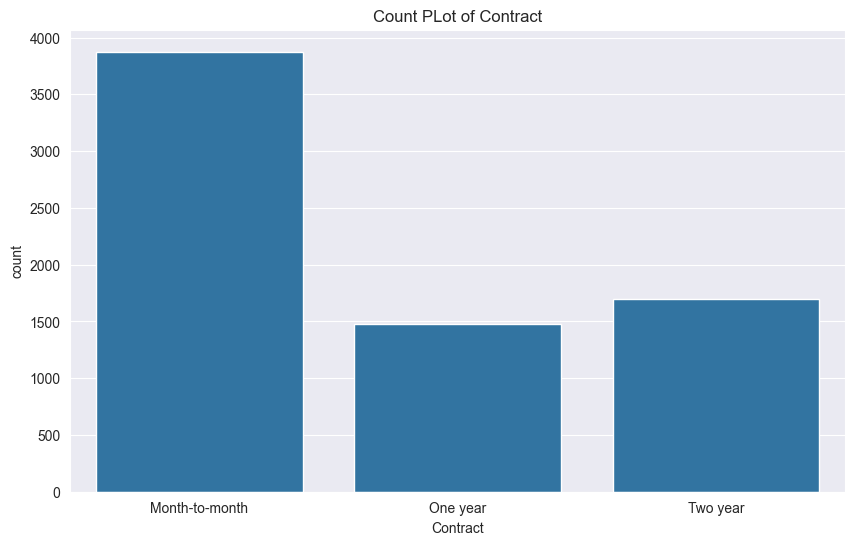

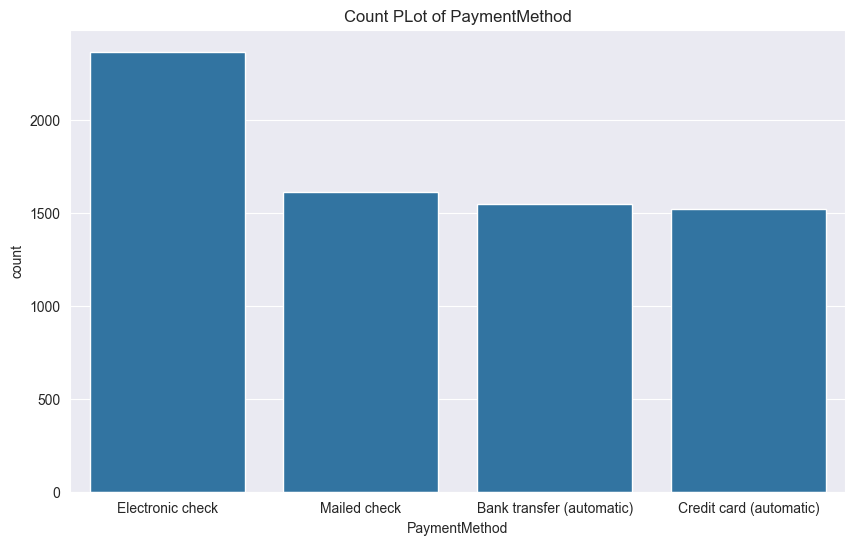

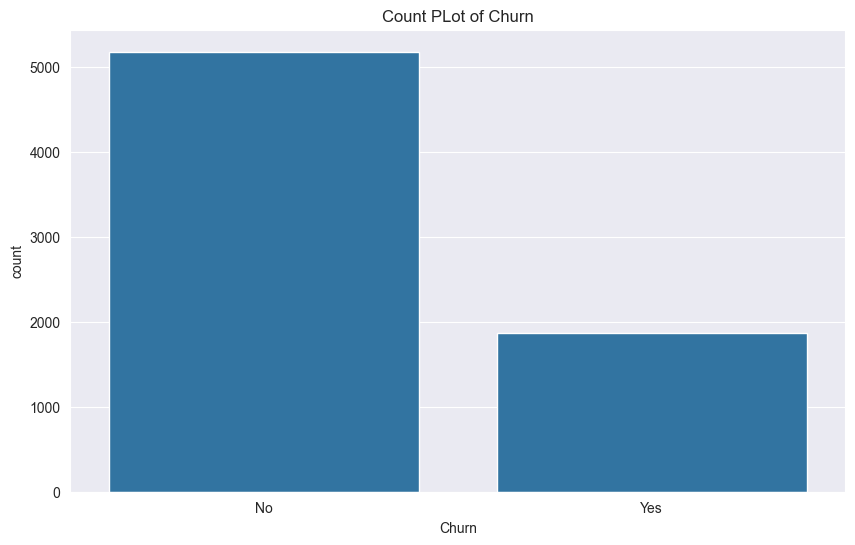

In [497]:
for cols in object_cols:
    plt.figure(figsize = (10,6))
    sns.countplot(x = df1[cols])
    plt.title(f'Count PLot of {cols}')
    plt.show()

In [498]:
df2['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [499]:
df2.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [500]:
df2['Churn'] = df1['Churn'].replace({'No':0, 'Yes':1})
df2['Churn'].unique()

C:\Users\BKJST\AppData\Local\Temp\ipykernel_6028\310284657.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Churn'] = df1['Churn'].replace({'No':0, 'Yes':1})


array([0, 1])

In [501]:
# lets check unique of all selected features
unique_values_per_columns = {col: df2[col]. unique() for col in df2.columns}
unique_values_per_columns

{'gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array([0, 1]),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'tenure': array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
        21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
         9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
        36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
        54, 51, 26,  0, 39]),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'TechSupport': array(['No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBackup': array(['Yes', 'No', 'No internet service'], dtype=object),
 'StreamingTV': array(['No', 'Yes', 'No internet service'], dtype=object),
 'Contract': array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 'PaymentMethod': 

### We can replace "No internet service" with No. But in my case by using same or "No". model score as it so i use by defaullt.

In [502]:
label = LabelEncoder()
label

LabelEncoder()

In [503]:
object_cols = ['gender','SeniorCitizen','Dependents','tenure','PhoneService','MultipleLines','InternetService','TechSupport',
          'OnlineBackup','StreamingTV','Contract','PaymentMethod','MonthlyCharges','TotalCharges']

In [504]:
# Apply label enocoders in all data

encoders = {}

for column in object_cols:
    label_encoder = LabelEncoder()
    df2[column] = label_encoder.fit_transform(df2[column])
    encoders[column] = label_encoder
    

In [505]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'TechSupport', 'OnlineBackup',
       'StreamingTV', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [506]:
encoders

{'gender': LabelEncoder(),
 'SeniorCitizen': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'tenure': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'MonthlyCharges': LabelEncoder(),
 'TotalCharges': LabelEncoder()}

In [507]:
# Save the complete encoded dictionary.

with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [508]:
df2.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,TechSupport,OnlineBackup,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,0,1,0,0,2,0,0,2,142,75,0
1,1,0,0,34,1,0,0,0,0,0,1,3,498,3625,0
2,1,0,0,2,1,0,0,0,2,0,0,3,436,537,1
3,1,0,0,45,0,1,0,2,0,0,1,0,266,3571,0
4,0,0,0,2,1,0,1,0,0,0,0,2,729,675,1


In [509]:
X = df2.drop(columns = ['Churn'], axis = 1)
y = df2.Churn


In [510]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state= 42,
                                                   stratify = y)
len(X), len(X_train), len(X_test)

(7043, 5634, 1409)

## Imbalanced handling. (Over sampling and up-sampling)

In [511]:
y_train.value_counts()

Churn
0    4139
1    1495
Name: count, dtype: int64

In [512]:
# As we are seeing our data is imbalanced.
smote = SMOTE(random_state = 42)
smote

SMOTE(random_state=42)

In [513]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,
                                                          y_train)
print(X_train_resampled, y_train_resampled)

      gender  SeniorCitizen  Dependents  tenure  PhoneService  MultipleLines  \
0          1              0           0      35             0              1   
1          1              0           1      15             1              0   
2          1              0           1      13             0              1   
3          0              0           0      26             1              0   
4          1              0           1       1             1              0   
...      ...            ...         ...     ...           ...            ...   
8273       0              0           0       9             1              0   
8274       0              0           0      11             1              2   
8275       1              0           0      48             1              2   
8276       0              0           0       2             1              2   
8277       0              0           0       1             1              0   

      InternetService  TechSupport  Onl

In [514]:
X_train_resampled.shape, y_train_resampled.shape

((8278, 14), (8278,))

In [515]:
y_train_resampled.value_counts() # now balanced.

Churn
0    4139
1    4139
Name: count, dtype: int64

# Model Training & selection of right model.

In [516]:
# Dictionary of models
models = {
    'Decision_Tree': DecisionTreeClassifier(random_state = 42),
    'Random_forest': RandomForestClassifier(random_state = 42),
    'XGBoost': XGBClassifier(random_forest = 42)
}

models

{'Decision_Tree': DecisionTreeClassifier(random_state=42),
 'Random_forest': RandomForestClassifier(random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=None, ...)}

In [517]:
# Cross validation score
cv_scores = {}

for model_name, model in models.items():
    print(model_name)
    print(model)
    print("-" * 50)

Decision_Tree
DecisionTreeClassifier(random_state=42)
--------------------------------------------------
Random_forest
RandomForestClassifier(random_state=42)
--------------------------------------------------
XGBoost
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
---------------------

In [518]:
for model_name, model in models.items():
    print(f'Training {model_name} with default parameters')
    scores = cross_val_score(model, X_train_resampled, y_train_resampled,
    cv=5, scoring =  'accuracy')

    cv_scores[model_name] = scores
    print(f'{model_name} coross validation accuracy: {np.mean(scores):.2f}')

Training Decision_Tree with default parameters
Decision_Tree coross validation accuracy: 0.78
Training Random_forest with default parameters
Random_forest coross validation accuracy: 0.83
Training XGBoost with default parameters


C:\Users\BKJST\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [02:43:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "random_forest" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\BKJST\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [02:43:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "random_forest" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\BKJST\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [02:43:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "random_forest" } are not used

XGBoost coross validation accuracy: 0.83


C:\Users\BKJST\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [02:43:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "random_forest" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [519]:
cv_scores

{'Decision_Tree': array([0.7071256 , 0.73309179, 0.83152174, 0.81873112, 0.82054381]),
 'Random_forest': array([0.75543478, 0.7705314 , 0.88405797, 0.88096677, 0.86646526]),
 'XGBoost': array([0.75422705, 0.76207729, 0.90338164, 0.87492447, 0.86767372])}

In [520]:
rfc_model = RandomForestClassifier(random_state = 42) # I will select Random Forest classifier, perform better for these kinds of datasets and also with missing data or unbalanced dataset.
rfc_model

RandomForestClassifier(random_state=42)

In [521]:
rfc_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [522]:
y_test.value_counts()

Churn
0    1035
1     374
Name: count, dtype: int64

In [523]:
y_test_pred = rfc_model.predict(X_test)
y_test_pred

array([0, 1, 0, ..., 0, 0, 0])

In [524]:
y_pred = y_test_pred

y_pred = pd.DataFrame(y_pred)
y_pred.value_counts()

0
0    1020
1     389
Name: count, dtype: int64

# Model Reports

In [525]:
# Lets check model Accuracy, confusion matrix and classification report
print('Accuracy Score: \n', accuracy_score(y_test, y_test_pred)) # after model fine tuning we can accuracy score.
print('Confusion matrix: \n', confusion_matrix(y_test, y_test_pred))
print('Classification Report: \n', classification_report(y_test, y_test_pred))

Accuracy Score: 
 0.7608232789212207
Confusion matrix: 
 [[859 176]
 [161 213]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1035
           1       0.55      0.57      0.56       374

    accuracy                           0.76      1409
   macro avg       0.69      0.70      0.70      1409
weighted avg       0.76      0.76      0.76      1409



In [526]:
X.columns.tolist()

['gender',
 'SeniorCitizen',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'TechSupport',
 'OnlineBackup',
 'StreamingTV',
 'Contract',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

# Save and load model

In [527]:
model_data = {"model":rfc_model, 'features_names': X.columns.tolist()}
model_data

{'model': RandomForestClassifier(random_state=42),
 'features_names': ['gender',
  'SeniorCitizen',
  'Dependents',
  'tenure',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'TechSupport',
  'OnlineBackup',
  'StreamingTV',
  'Contract',
  'PaymentMethod',
  'MonthlyCharges',
  'TotalCharges']}

# Save and Load model

In [528]:
# Save model
with open('customer_churn_model.pkl', 'wb') as f:
    pickle.dump(model_data, f) # Save model

In [529]:
# Load model
with open('customer_churn_model.pkl', 'rb') as f:
    load_model = pickle.load(f)

In [530]:
loaded_model = load_model['model']
loaded_model

RandomForestClassifier(random_state=42)

In [531]:
features_names = model_data['features_names']
print(features_names)

['gender', 'SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'TechSupport', 'OnlineBackup', 'StreamingTV', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [532]:
loaded_model.score(X_test, y_test)

0.7608232789212207

In [533]:
# df[['gender','SeniorCitizen','Dependents','tenure','PhoneService','MultipleLines','InternetService','TechSupport',
#           'OnlineBackup','StreamingTV','PaymentMethod','MonthlyCharges','TotalCharges']]

In [534]:
keys = ['gender','SeniorCitizen','Dependents','tenure','PhoneService','MultipleLines','InternetService','TechSupport',
          'OnlineBackup','StreamingTV','Contract','PaymentMethod','MonthlyCharges','TotalCharges']
values = ['Female',0,'No',1,'No','No phone service',	'DSL',	'No','Yes',	'No','Month-to-month','Electronic check',29.85,29.85]
input_data = dict(zip(keys, values))
input_data

{'gender': 'Female',
 'SeniorCitizen': 0,
 'Dependents': 'No',
 'tenure': 1,
 'PhoneService': 'No',
 'MultipleLines': 'No phone service',
 'InternetService': 'DSL',
 'TechSupport': 'No',
 'OnlineBackup': 'Yes',
 'StreamingTV': 'No',
 'Contract': 'Month-to-month',
 'PaymentMethod': 'Electronic check',
 'MonthlyCharges': 29.85,
 'TotalCharges': 29.85}

# Prediction

In [535]:
# Define function create meaningful prediction.
def  prediction(prediction):
    if prediction == 0:
        print("This customer will not churn.")
    elif prediction == 1:
        print("This customer will likely to churn.")
    else:
        print("This is an invalid Input.")

In [536]:
encoders

{'gender': LabelEncoder(),
 'SeniorCitizen': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'tenure': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'MonthlyCharges': LabelEncoder(),
 'TotalCharges': LabelEncoder()}

In [537]:
input_data_df = pd.DataFrame([input_data])
input_data_df

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,TechSupport,OnlineBackup,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,No,1,No,No phone service,DSL,No,Yes,No,Month-to-month,Electronic check,29.85,29.85


In [538]:
for column, encoder in encoders.items():
    if column in input_data_df.columns:
        ## Add new label dynamically.
        new_classes = set(input_data_df[column]) - set(encoder.classes_)
        if new_classes:
            encoder.classes_ = np.append(encoder.classes_, list(new_classes))
        input_data_df[column] = encoder.transform(input_data_df[column])

In [539]:
input_data_df = input_data_df[model_data['features_names']]
input_data_df

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,TechSupport,OnlineBackup,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,0,1,0,0,2,0,0,2,142,75


In [540]:
prediction(rfc_model.predict(input_data_df))

This customer will not churn.


In [541]:
# prediction with load model
prediction(loaded_model.predict(input_data_df)) # So both model working well.

This customer will not churn.
